# COVID-19 

----

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

### Requirements

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* [x] Visualize data with dimensionality reduction algorithms.
- [x] Perform cluster analysis.
* Use a linear model to explain relationships by correlation and predict new values.

#### Presentation
* Present the project - the data, methods and results.

#### Evaluation Criteria
- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- [x] Both PCA and T-SNE algorithms are used.


<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

### Getting started

In [4]:
# importing the necessary modules
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [232]:
# Load the data
case = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Case.csv?token=AFU2SI6VUUPBE5YQYZMOLXC72HE3S")
patient = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/PatientInfo.csv?token=AFU2SI3MJJRN7U6ASU47T4C72HE2G")
policy = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Policy.csv?token=AFU2SIY2DTJJUOJKVJ6FRHK72HGLI")
region = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Region.csv?token=AFU2SIYZDGW7DBUX7RYONTS72HGJU")
search_trend = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/SearchTrend.csv?token=AFU2SI6XXFGO6I7ZNW6SAUK72HGHU")
# seoul = pd.read_csv("https://github.com/TuringCollegeSubmissions/lcramw-DS.1.4/blob/master/SeoulFloating.csv.zip?raw=true")
time = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Time.csv?token=AFU2SI3BAPSZX6HQDT4SZZ272HGFS")
time_age = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeAge.csv?token=AFU2SI7BED77ELOCPDVT2YC72HGEU")
time_gender = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeGender.csv?token=AFU2SIZMN7GXCQHJ5IHQIMK72HGC2")
time_province = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/TimeProvince.csv?token=AFU2SI2GS5CZLMYM2GSQP3272HGBS")
weather = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Weather.csv?token=AFU2SI7TOYZRPM5GX6JMVOC72HGAU")

In [223]:
# Loading extra data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-22-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-22-2020.csv')

### EDA

In [6]:
patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [11]:
patient.shape

(5165, 14)

In [12]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [4]:
print("first Infected date in korea: ", patient['confirmed_date'][0])

first Infected date in korea:  2020-01-23


In [ ]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [ ]:
region.shape

(244, 12)

In [153]:
province = region[['province','elementary_school_count','kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']]

In [164]:
province.describe().round(2)

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,244.00,244.00,244.00,244.00,244.00,244.00,244.00
mean,74.18,107.90,4.15,1.29,20.92,10.64,1159.26
std,402.71,588.79,22.51,0.59,8.09,5.60,6384.19
min,4.00,4.00,0.00,0.19,7.69,3.30,11.00
25%,14.75,16.00,0.00,0.87,14.12,6.10,111.00
50%,22.00,31.00,1.00,1.27,18.53,8.75,300.00
75%,36.25,55.25,3.00,1.61,27.26,14.62,694.50
max,6087.00,8837.00,340.00,4.18,40.26,24.70,94865.00


In [154]:
province_df = province.groupby(['province']).mean().round(1)
province_df.head()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
province,,,,,,,
Busan,35.8,48.0,2.6,1.3,19.4,9.1,794.4
Chungcheongbuk-do,43.2,54.7,2.8,1.0,23.2,11.8,461.5
Chungcheongnam-do,51.1,62.4,2.6,1.1,23.8,11.7,455.1
Daegu,50.9,78.9,2.4,1.7,17.0,8.0,1129.6
Daejeon,49.3,86.7,5.0,1.4,14.4,6.2,994.7


In [157]:
province_df.shape

(17, 7)

In [156]:
# Drop korea because it's the total
province_df.drop(index='Korea', inplace=True)

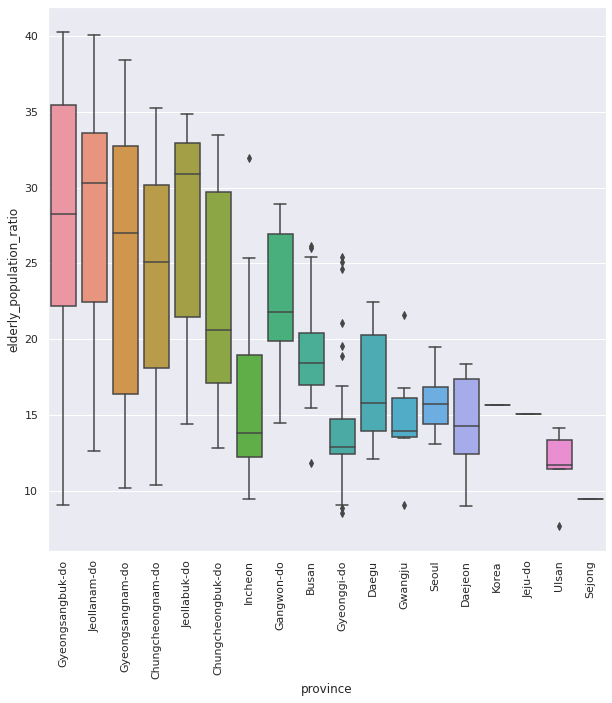

In [173]:
plt.figure(figsize=(10,10))

province_sorted = province[['province', 'elderly_population_ratio']].sort_values(by='elderly_population_ratio', ascending=False)
sns.set(style="darkgrid")

sns.boxplot(data=province_sorted, x='province', y='elderly_population_ratio')

plt.xticks(rotation=90)

plt.show()

In [158]:
province_df.elementary_school_count.nlargest(3)

province
Jeju-do         113.0
Gyeonggi-do      79.8
Jeollabuk-do     55.9
Name: elementary_school_count, dtype: float64

In [159]:
province_df.elementary_school_count.nsmallest(3)

province
Busan           35.8
Gangwon-do      36.7
Jeollanam-do    37.3
Name: elementary_school_count, dtype: float64

In [160]:
province_df.nursing_home_count.nlargest(3)

province
Seoul          1749.2
Gyeonggi-do    1280.7
Jeju-do        1245.0
Name: nursing_home_count, dtype: float64

In [161]:
province_df.nursing_home_count.nsmallest(3)

province
Gangwon-do          265.2
Jeollanam-do        294.7
Gyeongsangbuk-do    372.8
Name: nursing_home_count, dtype: float64

In [16]:
agg = patient[['state','patient_id']].groupby('state').count().reset_index().sort_values(by =  'patient_id')

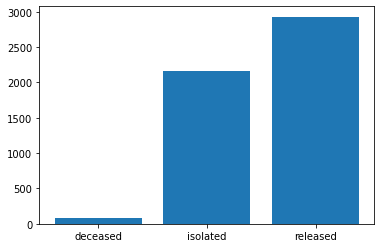

In [29]:
plt.bar(x=list(agg['state']), 
            height=list(agg['patient_id']))
plt.show()

In [26]:
infection_agg = patient[['infection_case','patient_id']].groupby('infection_case').count().reset_index().sort_values(by =  'patient_id')

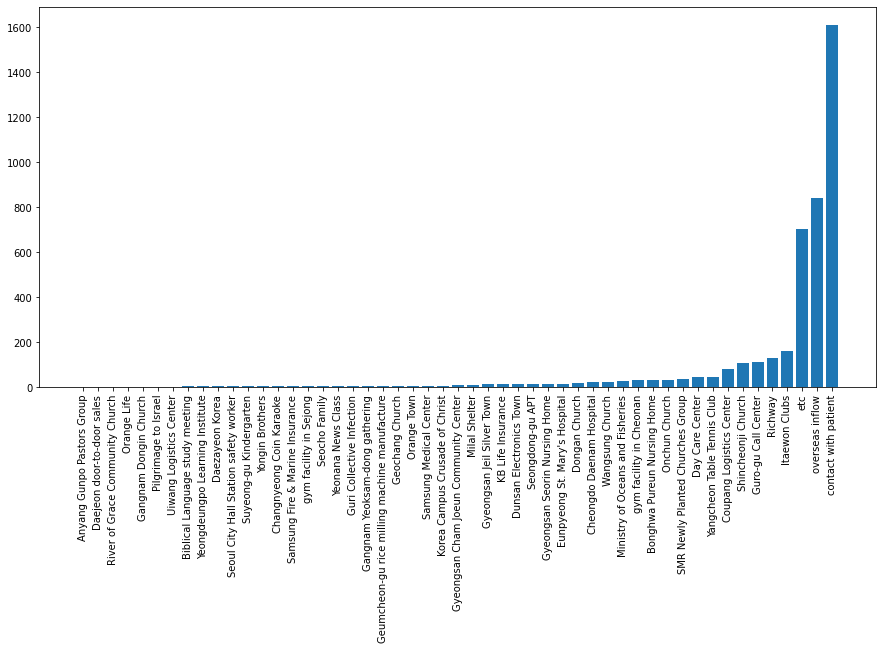

In [38]:
plt.figure(figsize=(15,7))

plt.bar(x=list(infection_agg['infection_case']), 
            height=list(infection_agg['patient_id']))

plt.xticks(rotation=90)
plt.show()

In [90]:
sizes = patient.sex.value_counts(normalize=True).tolist()

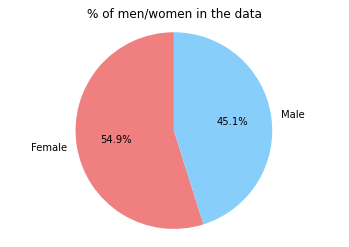

In [93]:
# Pie chart
labels = 'Female', 'Male'

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.axis('equal') 
plt.title('% of men/women in the data')

plt.show()

In [85]:
gender = patient.groupby('sex')
gender.state.value_counts()

sex     state   
female  released    1402
        isolated     788
        deceased      28
male    released    1112
        isolated     666
        deceased      47
Name: state, dtype: int64

In [123]:
sizes2 = gender.state.value_counts(normalize=True).tolist()

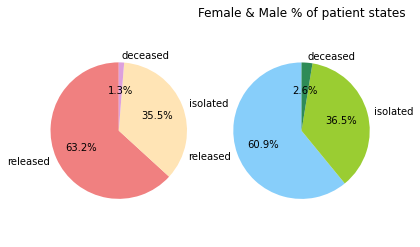

In [122]:
# Pie chart
labels = 'released', 'isolated', 'deceased'
colors = ['lightcoral', 'moccasin', 'plum']
colors_male = ['lightskyblue', 'yellowgreen', 'seagreen']

fig, ax = plt.subplots(1, 2)
ax[0].pie(sizes2[0:3], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].axis('equal') 

ax[1].pie(sizes2[3:6], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_male)
ax[1].axis('equal') 
plt.title('Female & Male % of patient states')

plt.show()

In [322]:
full_features_df = patient.merge(region, how='left', on=['province', 'city'])

In [323]:
full_features_df.drop(columns=['patient_id', 'country', 'confirmed_date', 'contact_number', 'infected_by', 'latitude', 'longitude', 'code', 'deceased_date', 'symptom_onset_date', 'released_date'], inplace=True)

In [324]:
full_features_df = full_features_df.reset_index(drop=True)
full_features_df.head()

,sex,age,province,city,infection_case,state,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,male,50s,Seoul,Gangseo-gu,overseas inflow,released,36.0,56.0,1.0,1.17,14.39,5.7,1080.0
1,male,30s,Seoul,Jungnang-gu,overseas inflow,released,23.0,31.0,1.0,0.70,16.65,6.9,689.0
2,male,50s,Seoul,Jongno-gu,contact with patient,released,13.0,17.0,3.0,1.71,18.27,6.8,668.0
3,male,20s,Seoul,Mapo-gu,overseas inflow,released,22.0,24.0,2.0,1.83,14.05,4.9,929.0
4,female,20s,Seoul,Seongbuk-gu,contact with patient,released,29.0,49.0,6.0,1.02,16.15,6.0,729.0


In [326]:
full_features_df['age'] = full_features_df['age'].str.replace('s', '')

In [328]:
full_features_df.shape

(5165, 13)

In [329]:
full_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       4043 non-null   object 
 1   age                       3785 non-null   object 
 2   province                  5165 non-null   object 
 3   city                      5071 non-null   object 
 4   infection_case            4246 non-null   object 
 5   state                     5165 non-null   object 
 6   elementary_school_count   4946 non-null   float64
 7   kindergarten_count        4946 non-null   float64
 8   university_count          4946 non-null   float64
 9   academy_ratio             4946 non-null   float64
 10  elderly_population_ratio  4946 non-null   float64
 11  elderly_alone_ratio       4946 non-null   float64
 12  nursing_home_count        4946 non-null   float64
dtypes: float64(7), object(6)
memory usage: 524.7+ KB


In [ ]:
# AGE IMPUTE MEAN??

In [330]:
full_features_df.dropna(subset=['elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count', 'sex', 'age', 'infection_case'], inplace=True)

In [331]:
full_features_df['age'] = full_features_df['age'].astype(int)

In [332]:
full_features_df = full_features_df.reset_index(drop=True)
full_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       2826 non-null   object 
 1   age                       2826 non-null   int64  
 2   province                  2826 non-null   object 
 3   city                      2826 non-null   object 
 4   infection_case            2826 non-null   object 
 5   state                     2826 non-null   object 
 6   elementary_school_count   2826 non-null   float64
 7   kindergarten_count        2826 non-null   float64
 8   university_count          2826 non-null   float64
 9   academy_ratio             2826 non-null   float64
 10  elderly_population_ratio  2826 non-null   float64
 11  elderly_alone_ratio       2826 non-null   float64
 12  nursing_home_count        2826 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 287.1+ KB


In [333]:
full_features_df.shape

(2826, 13)

In [334]:
full_features_df.isnull().sum()

sex                         0
age                         0
province                    0
city                        0
infection_case              0
state                       0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [335]:
full_features_df.sex.value_counts()

female    1507
male      1319
Name: sex, dtype: int64

In [336]:
full_features_df.province.value_counts()

Gyeonggi-do          828
Seoul                542
Gyeongsangbuk-do     532
Chungcheongnam-do    167
Busan                139
Gyeongsangnam-do     129
Daejeon              118
Incheon               89
Gangwon-do            61
Chungcheongbuk-do     56
Ulsan                 53
Sejong                50
Jeollabuk-do          17
Daegu                 17
Jeju-do               14
Jeollanam-do          14
Name: province, dtype: int64

In [337]:
full_features_df.state.value_counts()

released    1775
isolated    1019
deceased      32
Name: state, dtype: int64

In [347]:
full_features_df.infection_case.value_counts()

contact with patient                     1077
etc                                       607
overseas inflow                           600
Guro-gu Call Center                       109
Shincheonji Church                         95
Onchun Church                              33
Bonghwa Pureun Nursing Home                31
gym facility in Cheonan                    30
Ministry of Oceans and Fisheries           28
Itaewon Clubs                              26
Coupang Logistics Center                   24
Cheongdo Daenam Hospital                   21
Dongan Church                              17
Gyeongsan Seorin Nursing Home              15
Eunpyeong St. Mary's Hospital              15
Dunsan Electronics Town                    13
Seongdong-gu APT                           13
Gyeongsan Jeil Silver Town                 12
Milal Shelter                              11
Gyeongsan Cham Joeun Community Center      10
Orange Town                                 7
Geochang Church                   

In [ ]:
search_trend.head()

In [ ]:
search_trend.info()

In [180]:
search_trend.set_index('date', inplace=True)

In [181]:
# Set as day for the plot
search_trend = search_trend.asfreq('D', method='pad')

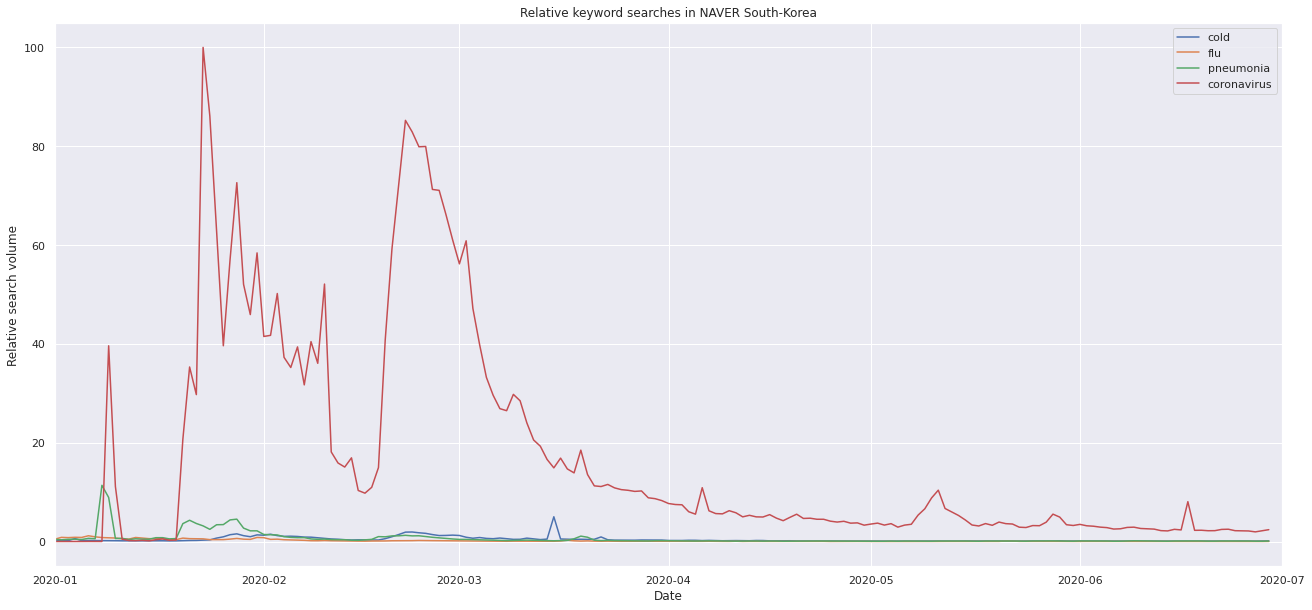

In [183]:
# Plot search_trend
plt.figure(figsize=(22,10))
plt.plot(search_trend)

# Set axis settings and labels
plt.ylabel('Relative search volume');
plt.xlabel('Date');
plt.title('Relative keyword searches in NAVER South-Korea')
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-07-01")))


# show a legend on the plot
plt.legend(labels=['cold', 'flu', 'pneumonia', 'coronavirus'])

In [230]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,Sum
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1535,1538,1538,1544,1547,1551,1557,1557,1559,1565,1577,1580,1584,1594,1598,1608,1620,1635,1641,1648,1653,1666,1678,1690,1702,1715,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864,1874,1900,247959
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,502,509,518,527,532,536,543,549,557,559,571,579,590,598,605,612,623,631,637,646,657,672,685,699,716,735,743,753,771,787,798,810,822,839,852,870,889,905,922,62617
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1956,1964,1973,1980,1980,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236,2255,2272,2294,2309,2329,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501,2516,2527,314001
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,78,78,78,13554
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,279,284,286,289,291,296,299,300,303,307,308,308,312,315,317,322,322,324,328,332,333,334,336,337,337,338,340,341,342,345,346,348,350,351,352,353,354,354,354,27600


In [226]:
deaths_df.dropna(subset=['Lat', "Long"], inplace=True)

In [227]:
column_list = list(deaths_df)
column_list.remove("Lat")
column_list.remove("Long")
column_list.remove("Country/Region")
column_list.remove('Province/State')

In [228]:
deaths_df["Sum"] = deaths_df[column_list].sum(axis=1)

### Statistical testing

In [ ]:
patient.sex.value_counts()

female    2218
male      1825
Name: sex, dtype: int64

In [ ]:
gender = patient.groupby('sex')
gender.state.value_counts()

sex     state   
female  released    1402
        isolated     788
        deceased      28
male    released    1112
        isolated     666
        deceased      47
Name: state, dtype: int64

In [208]:
patient['age'] = patient['age'].str.replace('s', '')
patient['age'] = patient['age'].astype(int)

In [201]:
patient.dropna(subset=['age'], inplace=True)

In [203]:
gender = patient.groupby('sex')
gender.state.value_counts()

sex     state   
female  released    1394
        isolated     646
        deceased      28
male    released    1103
        isolated     564
        deceased      47
Name: state, dtype: int64

In [215]:
# age
gender.agg({"age": [np.mean, np.std, np.size]})

age                 
             mean        std  size
sex                               
female  42.567698  20.229280  2068
male    37.736289  19.850827  1714

In [210]:
import statsmodels.api as sm

# Z-Test CTR
print(sm.stats.ztest(patient[patient['sex'] == 'female'].age, patient[patient['sex'] == 'male'].age)) # prints test statistic, p-value

(7.37380757644738, 1.6582248370749386e-13)


Parametric test assumptions

*   Independence: Meaning that each observation is independent of another; if there are 2 or more groups being compared, then it refers to that fact that groups are mutually exclusive, i.e. each individual belongs to only 1 group; and that the data is not repeated over time.
*   Population distributions are normal: The normality assumption is applied differently depending on the statistical method being used. For example, it applies to the shape of the sampling distribution for the dependent variable (outcome variable).
*   Samples have equal variances

Since clusters are already different (point of clustering), let's see if one variable is different form the population

In [33]:
# Create dataframes for each cluster
cluster_1 = full_features_df.query('cluster == 1')
cluster_2 = full_features_df.query('cluster == 2')
cluster_3 = full_features_df.query('cluster == 3')

In [44]:
np.var(cluster_1.elderly_population_ratio)

3.236025959153197

In [45]:
np.var(cluster_2.elderly_population_ratio)

28.89441501781002

In [46]:
np.var(cluster_3.elderly_population_ratio)

7.553226950501664

In [34]:
# Check bartlett's equality of variance test
stats.bartlett(cluster_1['elderly_population_ratio'],
               cluster_2['elderly_population_ratio'],
               cluster_3['elderly_population_ratio'])

BartlettResult(statistic=975.6649699176323, pvalue=1.3710196813142527e-212)

Heteroskedasticity!

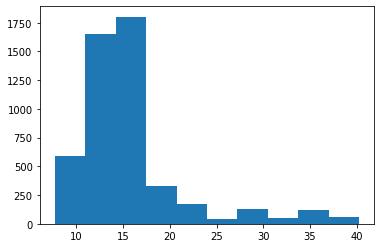

In [35]:
# Check overall population for normality
pyplot.hist(full_features_df.elderly_population_ratio)
pyplot.show()

Text(0.5, 1.0, 'Cluster 3')

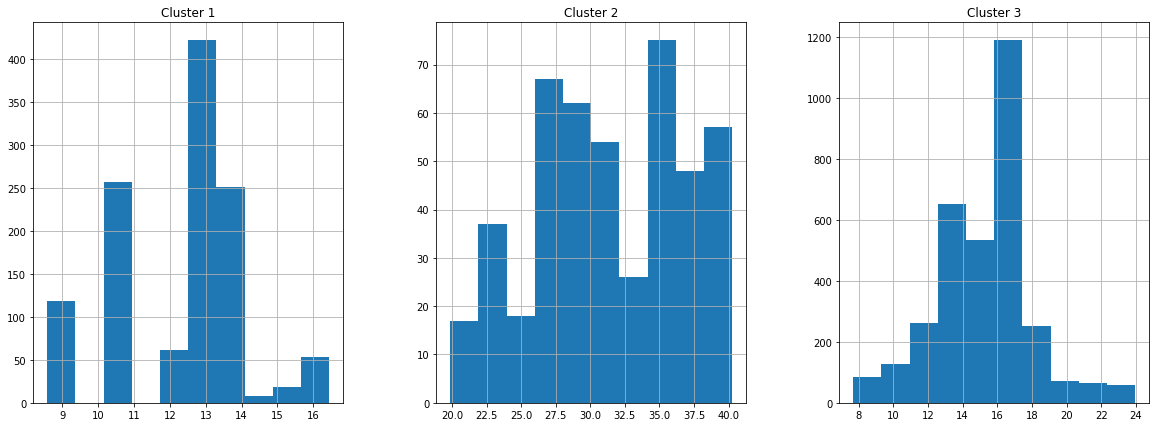

In [36]:
# Plot clusters to check for normality
fig, axes = plt.subplots(1, 3, figsize=(20,7))

cluster_1.hist('elderly_population_ratio', ax=axes[0])
cluster_2.hist('elderly_population_ratio', ax=axes[1])
cluster_3.hist('elderly_population_ratio', ax=axes[2])
axes[0].set_title('Cluster 1')
axes[1].set_title('Cluster 2')
axes[2].set_title('Cluster 3')

In [37]:
pip install researchpy

In [38]:
import researchpy as rp
rp.summary_cont(full_features_df['elderly_population_ratio'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,elderly_population_ratio,4946.0,15.992,5.8746,0.0835,15.8282,16.1557


In [39]:
rp.summary_cont(full_features_df['elderly_population_ratio'].groupby(full_features_df['cluster']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster,,,,,,
1,1189,12.2503,1.7997,0.0522,12.1479,12.3527
2,461,31.4243,5.3812,0.2506,30.9318,31.9169
3,3296,15.1832,2.7487,0.0479,15.0894,15.2771


In [40]:
stats.f_oneway(full_features_df['elderly_population_ratio'][full_features_df['cluster'] == 1],
               full_features_df['elderly_population_ratio'][full_features_df['cluster'] == 2],
               full_features_df['elderly_population_ratio'][full_features_df['cluster'] == 3],)

F_onewayResult(statistic=7555.641862365667, pvalue=0.0)

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('elderly_population_ratio ~ C(cluster)', data=full_features_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cluster),128592.335559,2.0,7555.641862,0.0
Residual,42063.396217,4943.0,NaN,NaN


In [42]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(cluster),128592.335559,2.0,64296.16778,7555.641862,0.0,0.753519,0.753382
Residual,42063.396217,4943.0,8.50969,NaN,NaN,NaN,NaN


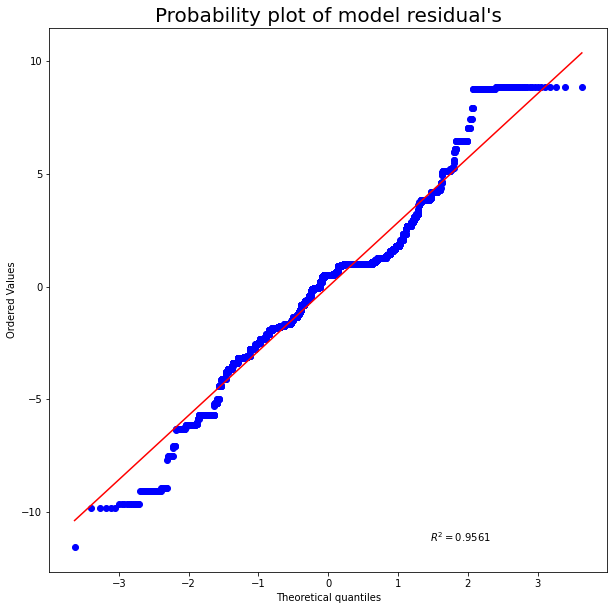

In [43]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

### Modeling

#### PCA

In [259]:
# Leave out state
features = ['elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count']
       
# Separating out the features
x = full_features_df.loc[:, features].values

# Separating out the target
y = full_features_df.loc[:,['state']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [260]:
# Visualise the standardised data (Just for simplicity)
see_x = pd.DataFrame(data=x, columns=features)
see_x.head()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,-0.140431,-0.222345,-0.769916,-0.537956,-0.316394,-0.423986,0.603171
1,-0.703677,-0.807401,-0.769916,-1.394640,0.034652,-0.143440,-0.087792
2,-1.136944,-1.135032,-0.175794,0.446320,0.286286,-0.166819,-0.124903
3,-0.747004,-0.971216,-0.472855,0.665047,-0.369207,-0.611017,0.336328
4,-0.443717,-0.386161,0.715388,-0.811365,-0.043013,-0.353850,-0.017106


In [261]:
# While applying StandardScaler, each feature of your data should be normally 
# distributed such that it will scale the distribution to a mean of zero
# and a standard deviation of one.
np.mean(x),np.std(x)

(1.0287071665606414e-16, 1.0)

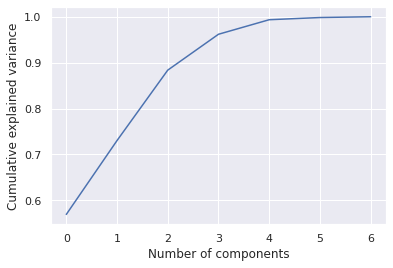

In [262]:
# Plot the explained variance per component added
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [263]:
# 2 PCA components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [264]:
# Check the head()
principal_df.head()

,principal component 1,principal component 2
0,-0.098714,0.710948
1,1.225669,0.416701
2,0.913776,0.858454
3,0.003382,1.259095
4,0.381039,-0.646232


In [265]:
# Concatenate and view head()
final_df_pca = pd.concat([principal_df[['principal component 1', 'principal component 2']], full_features_df[['state']]], axis = 1)
final_df_pca.head()

,principal component 1,principal component 2,province
0,-0.098714,0.710948,Seoul
1,1.225669,0.416701,Seoul
2,0.913776,0.858454,Seoul
3,0.003382,1.259095,Seoul
4,0.381039,-0.646232,Seoul


<Figure size 720x720 with 0 Axes>

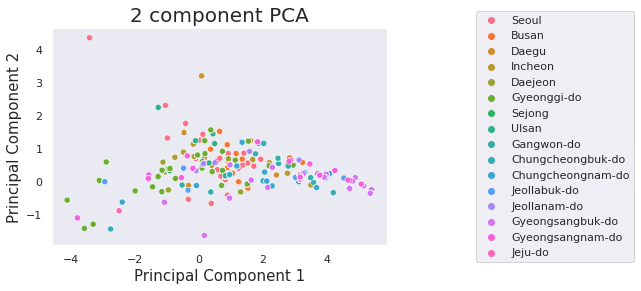

In [267]:
# Scatterplot 
fig = plt.figure(figsize = (10,10))

fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

sns.scatterplot(x=final_df_pca['principal component 1'], y=final_df_pca['principal component 2'], hue=final_df_pca.state)
# g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


ax.grid()

In [268]:
# Explained variance of the components
pca.explained_variance_ratio_

array([0.56943518, 0.16088839])

#### T-SNE

In [ ]:
# Initialise T-SNE and set 2 components
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
# Feed the features dataset 
tsne_obj= tsne.fit_transform(x)

In [ ]:
# View the head()
tsne_df = pd.DataFrame(data = tsne_obj
             , columns = ['X', 'Y'])

tsne_df.head()

,X,Y
0,-2.901429,-7.742569
1,50.505646,57.238605
2,-4.202808,-24.671047
3,14.021624,-60.357304
4,67.914452,45.932995


In [ ]:
# Concatenate and view again
final_tsne_df = pd.concat([tsne_df, full_features_df[['state']]], axis = 1)
final_tsne_df.head()

,X,Y,state
0,-2.901429,-7.742569,released
1,50.505646,57.238605,released
2,-4.202808,-24.671047,released
3,14.021624,-60.357304,released
4,67.914452,45.932995,released


<Figure size 576x576 with 0 Axes>

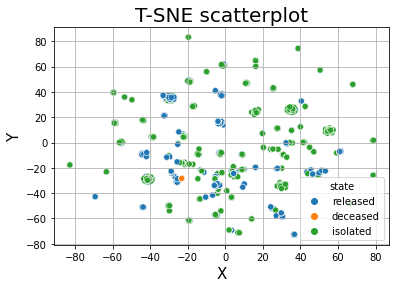

In [ ]:
# T-SNE scatterplot
fig = plt.figure(figsize = (8,8))

fig, ax = plt.subplots()

ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_title('T-SNE scatterplot', fontsize = 20)

sns.scatterplot(x="X", y="Y", hue="state", data=final_tsne_df);
ax.grid()

#### Kmeans clustering

In [ ]:
# Prepare a dataframe for Kmeans clustering
# cluster_df = model.drop(columns=['genre'])

In [269]:
# Calculate the within cluster SSE (distortion)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principal_df) # x is standardized
    distortions.append(kmeanModel.inertia_)

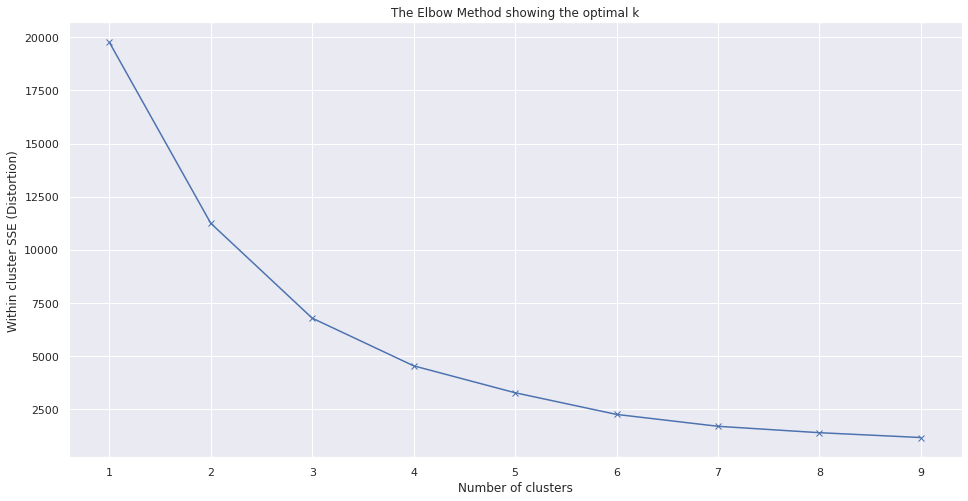

In [270]:
# Plot the elbow figure
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster SSE (Distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [271]:
pip install kneed

In [272]:
# Installing kneed
from kneed import DataGenerator, KneeLocator

In [273]:
# Using kneed to programmatically check elbow point
kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
kl.elbow

3

In [274]:
# Fit and predict the Kmeans model
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(principal_df)
y_kmeans = kmeanModel.predict(principal_df)

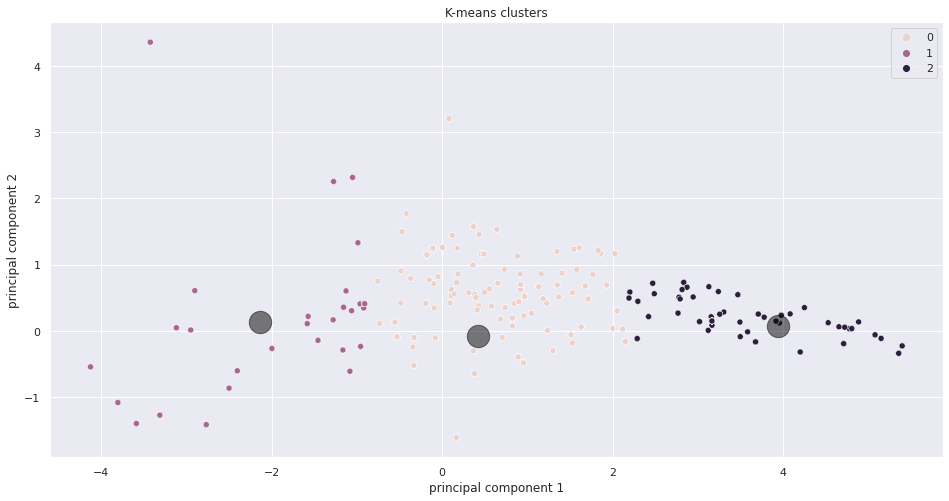

In [275]:
# plot points
plt.figure(figsize=(16,8))
plt.title('K-means clusters')

sns.scatterplot(data=principal_df, x='principal component 1', y='principal component 2', hue=y_kmeans)


# plot cluster centers
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

In [276]:
# Add column for cluster labels
full_features_df['cluster'] = kmeanModel.labels_

In [277]:
# change clusters to 1 - 3 instead of 0 - 2
full_features_df['cluster'] = full_features_df['cluster'].map({0:1, 1:2, 2:3}) 

In [278]:
# Group by cluster
grouped_by_cluster = full_features_df.groupby('cluster')

In [ ]:
# Get the percentages of states in each cluster
df = pd.concat([grouped_by_cluster.state.value_counts(), 
                grouped_by_cluster.state.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

df.round(2)

Seems like the highest percentage of deceased patients are in cluster 3, but the highest absolute number of deceased patients is in cluster 2.

In [280]:
grouped_by_cluster.mean()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
cluster,,,,,,,
1,29.488777,48.76317,4.184608,1.364585,15.817897,6.858635,536.658727
2,64.950925,111.95897,3.662108,1.901955,12.087554,4.954465,1314.633950
3,15.106335,17.51810,0.466063,0.733326,31.638032,17.944796,116.735294


It seems that cluster 3 has a higher percentage of `elderly_population` compared to the other 2 clusters

#### linear regression

In [348]:
# Add categorised values
full_features_df['state_cat'] = full_features_df['state'].astype('category').cat.codes

In [356]:
features_lin = ['age','sex', 'infection_case', 'province', 'city', 'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count']

In [357]:
X = full_features_df[features_lin]

In [358]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,sex_male,infection_case_Bonghwa Pureun Nursing Home,infection_case_Changnyeong Coin Karaoke,infection_case_Cheongdo Daenam Hospital,infection_case_Coupang Logistics Center,infection_case_Dongan Church,infection_case_Dunsan Electronics Town,infection_case_Eunpyeong St. Mary's Hospital,infection_case_Geochang Church,infection_case_Guro-gu Call Center,infection_case_Gyeongsan Cham Joeun Community Center,infection_case_Gyeongsan Jeil Silver Town,infection_case_Gyeongsan Seorin Nursing Home,infection_case_Itaewon Clubs,infection_case_KB Life Insurance,infection_case_Milal Shelter,infection_case_Ministry of Oceans and Fisheries,infection_case_Onchun Church,infection_case_Orange Town,infection_case_Pilgrimage to Israel,infection_case_Richway,infection_case_River of Grace Community Church,infection_case_SMR Newly Planted Churches Group,infection_case_Samsung Fire & Marine Insurance,infection_case_Seongdong-gu APT,infection_case_Seoul City Hall Station safety worker,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,...,city_Sasang-gu,city_Sejong,city_Seo-gu,city_Seocheon-gun,city_Seocho-gu,city_Seodaemun-gu,city_Seongbuk-gu,city_Seongdong-gu,city_Seongju-gun,city_Seongnam-si,city_Seosan-si,city_Siheung-si,city_Sokcho-si,city_Songpa-gu,city_Suncheon-si,city_Suseong-gu,city_Suwon-si,city_Suyeong-gu,city_Taean-gun,city_Taebaek-si,city_Uijeongbu-si,city_Uiseong-gun,city_Uiwang-si,city_Ulju-gun,city_Wonju-si,city_Yangcheon-gu,city_Yangju-si,city_Yangsan-si,city_Yecheon-gun,city_Yeongcheon-si,city_Yeongdeungpo-gu,city_Yeongju-si,city_Yeongwol-gun,city_Yeongyang-gun,city_Yeonje-gu,city_Yeonsu-gu,city_Yeosu-si,city_Yongin-si,city_Yongsan-gu,city_Yuseong-gu
0,50,36.0,56.0,1.0,1.17,14.39,5.7,1080.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,23.0,31.0,1.0,0.70,16.65,6.9,689.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,50,13.0,17.0,3.0,1.71,18.27,6.8,668.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20,22.0,24.0,2.0,1.83,14.05,4.9,929.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,29.0,49.0,6.0,1.02,16.15,6.0,729.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [359]:
# Get y value (we already have x standardized)
# Separating out the features
x = full_features_df.loc[:, features_lin].values

# Separating out the target
# y = full_features_df.loc[:,['state']].values

# Standardizing the features
x = StandardScaler().fit_transform(X)

y = full_features_df[['state_cat']]

In [360]:
# initialise the linear regression and fit the model
linear_model = LinearRegression().fit(x, y)

In [361]:
# Check the values
r_sq = linear_model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', linear_model.intercept_)
print('slope:', linear_model.coef_)

coefficient of determination: 0.6981203815951741
intercept: [1.61677354]
slope: [[-3.48485869e-02  8.59436568e-01 -1.33495586e+00 -7.85839309e-03
  -5.89285817e-02  6.50807714e-01 -6.66342145e-01  4.94485704e-01
  -1.21399343e-02  1.95202750e-03 -7.94832927e-04  6.30021846e-02
  -5.34911347e-03 -1.75219121e-03 -2.80357001e-02  1.37865421e-03
   2.59144265e-04 -6.81841636e-03  1.55380887e-02  4.50774146e-03
   1.95108212e-02 -1.04539885e-02 -3.86646407e-04  3.55804519e+11
   1.42925449e-02  2.91018568e-02 -2.03207248e-02  1.17921185e-02
  -1.98880519e-02  2.01498411e-04 -9.85716514e-03  1.92863755e-04
  -2.38826124e-03 -1.81834698e-02  1.46169662e-02  8.23783875e-03
  -1.10206604e-02 -2.55966187e-03 -4.12750244e-03  4.68873978e-03
  -2.46353149e-02 -2.15087908e+11  9.14423557e+10 -2.48894691e-02
  -6.45446777e-03 -7.48161289e+11  2.01508922e+12  1.38315255e+12
   5.02561329e+10  1.51512146e-01  3.44870011e+11  9.20473413e+11
   3.00051656e+11 -9.68370156e+10  5.37872314e-03  1.41883850e

In [290]:
# Get the prediction from the model
y_pred = linear_model.predict(x)

In [291]:
# Map the states
mapped_states = dict( enumerate(full_features_df['province'].astype('category').cat.categories))

In [292]:
# Set prediction as dataframe
predicted_df = pd.DataFrame(y_pred.astype('int'), columns=['predicted'])

In [293]:
# Add the predicted state
predicted_df['predicted_state'] = predicted_df['predicted'].map(mapped_states)

In [294]:
predicted_df.head()

,predicted,predicted_state
0,9,Incheon
1,10,Jeju-do
2,9,Incheon
3,10,Jeju-do
4,9,Incheon


In [295]:
# Check with actual state
predicted_final_df = pd.concat([predicted_df, full_features_df[['province']]], axis=1)
predicted_final_df.head()

,predicted,predicted_state,province
0,9,Incheon,Seoul
1,10,Jeju-do,Seoul
2,9,Incheon,Seoul
3,10,Jeju-do,Seoul
4,9,Incheon,Seoul


In [ ]:
predicted_final_df.state.value_counts()

released    2835
isolated    2056
deceased      55
Name: state, dtype: int64

In [ ]:
predicted_final_df.predicted_state.value_counts()

isolated    4765
deceased     153
released      28
Name: predicted_state, dtype: int64

In [ ]:
# PCA hieronder doet het niet goed!

In [ ]:
# Add categorised values
final_df_pca['state_cat'] = final_df_pca['state'].astype('category').cat.codes

In [ ]:
# Separating out the features
x = final_df_pca.loc[:, ['principal component 1', 'principal component 2']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

y = final_df_pca[['state_cat']]

In [ ]:
# initialise the linear regression and fit the model
linear_model = LinearRegression().fit(x, y)

In [ ]:
# Check the values
r_sq = linear_model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', linear_model.intercept_)
print('slope:', linear_model.coef_)

coefficient of determination: 0.03731082051303869
intercept: [1.56207036]
slope: [[ 0.09970918 -0.00847562]]


In [ ]:
# Get the prediction from the model
y_pred_pca = linear_model.predict(x)

In [ ]:
# Map the states
mapped_states_pca = dict( enumerate(final_df_pca['state'].astype('category').cat.categories))

In [ ]:
# Set prediction as dataframe
predicted_df_pca = pd.DataFrame(y_pred_pca.astype('int'), columns=['predicted'])

In [ ]:
# Add the predicted state
predicted_df_pca['predicted_state'] = predicted_df_pca['predicted'].map(mapped_states_pca)

In [ ]:
# Check with actual state
predicted_final_df_pca = pd.concat([predicted_df_pca, final_df_pca[['state']]], axis=1)
predicted_final_df_pca.head()

,predicted,predicted_state,state
0,1,isolated,released
1,1,isolated,released
2,1,isolated,released
3,1,isolated,released
4,1,isolated,released


In [ ]:
predicted_final_df_pca.predicted_state.value_counts()

isolated    4946
Name: predicted_state, dtype: int64

#### correlation

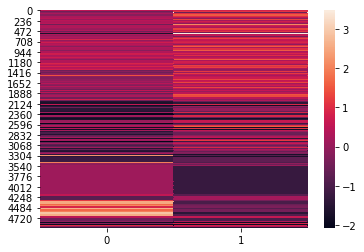

In [ ]:
sns.heatmap(data=x)